# Assignment 8. Global Convexity (fitness-distance/similarity correlations) tests

- Nikita Makarevich 153989
- Wojciech Mączka 148106

1. Source code - [GitHub](https://github.com/AmevinLS/evo-compute)
2. Results checked with solution checker - **YES**

## Problem Description

The Travelling Salesman Problem (TSP) is an NP-Hard problem of selecting a permutation of nodes of some graph $G$, such that the nodes form a Hamiltionian cycle, and the totalx length of the path plus the total cost of the included nodes is minimized. Additionaly in the version of the problem tackled in this work, it is required to choose at most $\lceil{\dfrac{N}{2}}\rceil$ nodes, where $N$ is the total number of nodes in the graph.

In this work we will tackle describing the similarity (supposedly inverse to distance) between found solutions. We will measure similarity by couting the common edges (method 1) and common nodes (method 2). Each solution will be either compared to the best solution amongst them (comparison 1) or all solutions will be compared with each other and results averaged (comparison 2). In total we will make 4 similarity measures per each TSP instance.  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid")

In [4]:
a_sims_df = pd.read_csv("../results/TSPA_similarities.csv")
b_sims_df = pd.read_csv("../results/TSPB_similarities.csv")

In [11]:
def plot_sims_df(df: pd.DataFrame, instance: str):
    fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

    clean_df = df.loc[df["num_common_edges"] < 100]

    fig.suptitle(instance)

    sns.scatterplot(clean_df, x="cost", y="num_common_edges", ax=axs[0, 0], alpha=0.5)
    axs[0, 0].set_title(
        f"vs Best Solution\n\ncorr = {clean_df.corr().loc['cost', 'num_common_edges']}"
    )
    sns.scatterplot(clean_df, x="cost", y="num_common_nodes", ax=axs[1, 0], alpha=0.5)
    axs[1, 0].set_title(f"corr = {clean_df.corr().loc['cost', 'num_common_nodes']}")

    sns.scatterplot(df, x="cost", y="avg_common_edges", ax=axs[0, 1], alpha=0.5)
    axs[0, 1].set_title(
        f"vs Other Solutions (avg)\n\ncorr = {clean_df.corr().loc['cost', 'avg_common_edges']}"
    )
    sns.scatterplot(df, x="cost", y="avg_common_nodes", ax=axs[1, 1], alpha=0.5)
    axs[1, 1].set_title(f"corr = {clean_df.corr().loc['cost', 'avg_common_nodes']}")

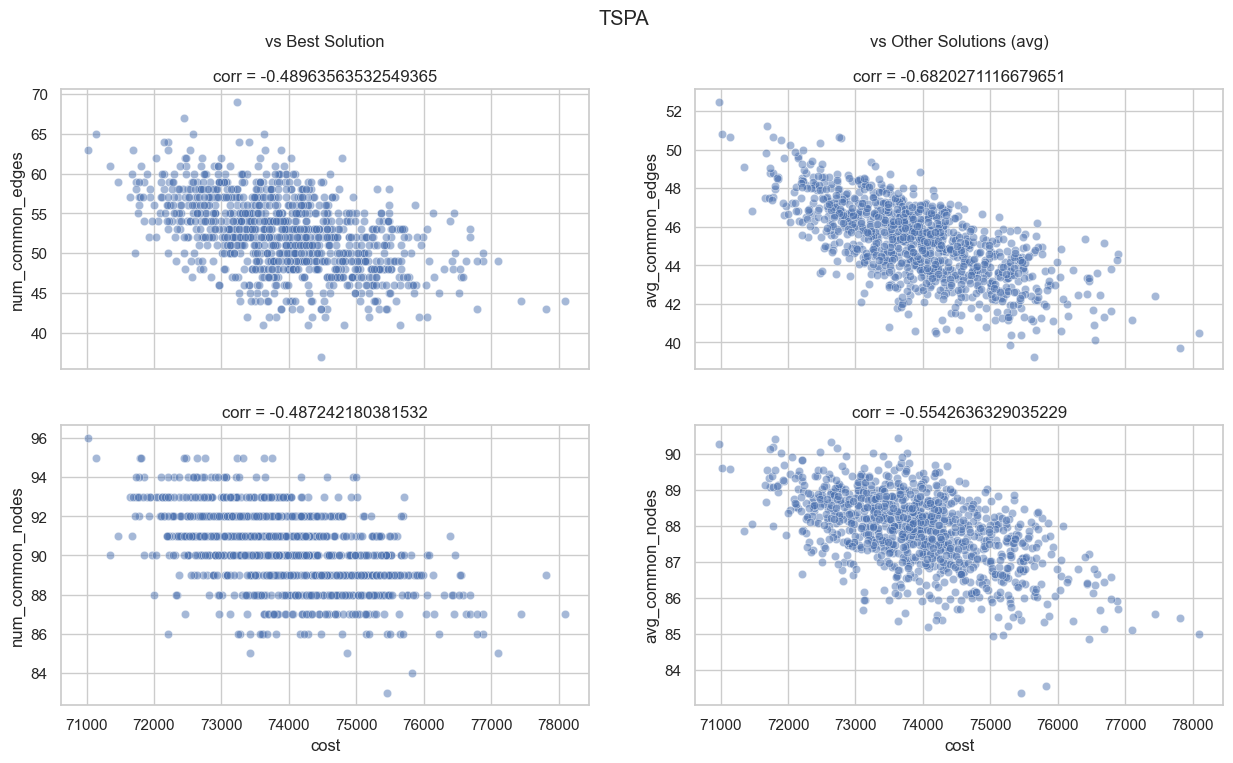

In [12]:
plot_sims_df(a_sims_df, "TSPA")

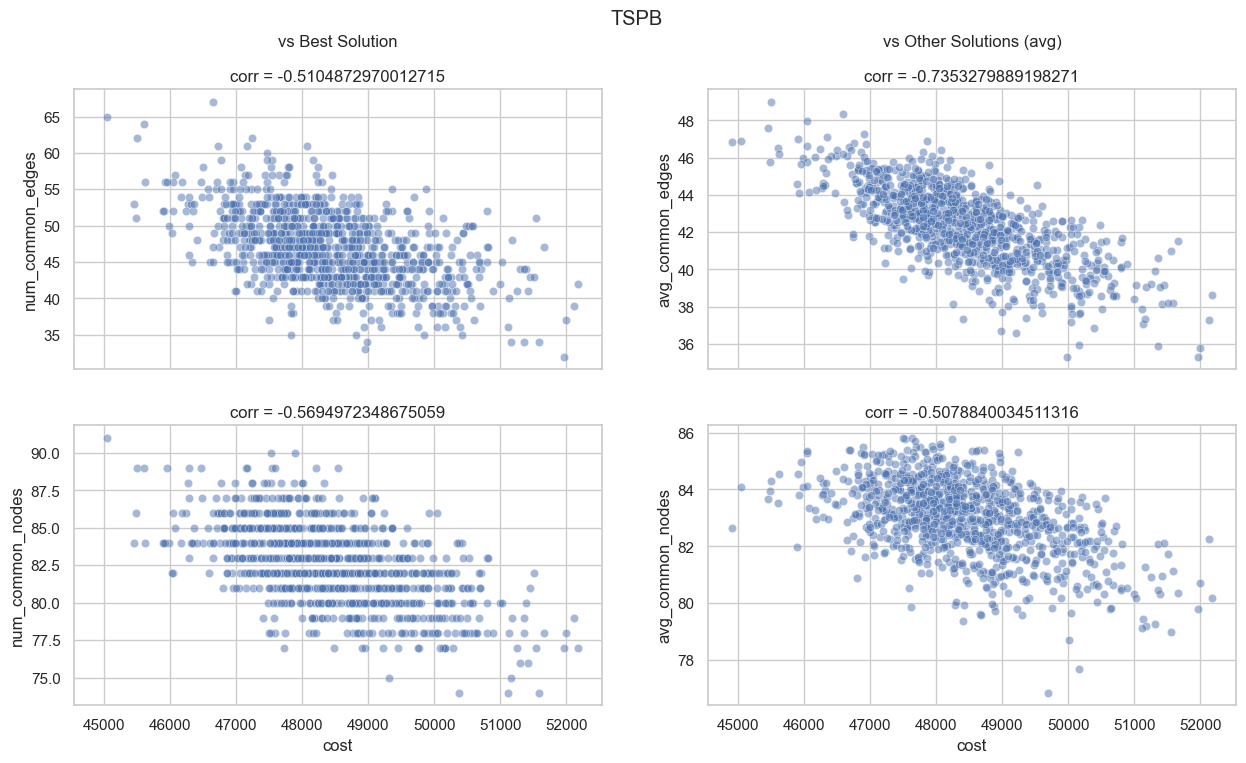

In [13]:
plot_sims_df(b_sims_df, "TSPB")

## Conclusions

Observation: are solutions are far more similar in terms of common nodes than edges (this is expected because an "edge" contains more information, and is therefore more restrictive than a single node).

Even though the negative correlation for all the cases isn't the strongest, it is nevertheless clearly visible. This could suggest that in general, the solution-cost space is generally convex (although not strictly convex of course). This is because the calculated negative correlations mean that the following tends to be true:
$-\alpha = \frac{\Delta\text{Cost}}{\text{Similarity}} < 0$, and $\text{Similarity}=-\text{Distance}$, therefore $\alpha = \frac{\Delta\text{Cost}}{\text{Distance}} > 0$, and $\alpha$ is in fact the **second derivative**